# Lecture 1

Models used to predict returns and evaluate risks

Benefits of Python
1. Simplicity
2. Readability

Essential Packages
1. Pandas
    - Time Series Data
    - Used to Preprocess Data
    [Pandas Documentation](https://pandas.pydata.org/about.html)
2. Numpy
    - Array and Matrix Computing
    - Generate Random Numbers for Shuffling Data
    [Numpy Documentation](http://www.numpy.org/)
3. Matplotlib
    - Used to produce figures
    [Matplotlib Documentation](https://matplotlib.org/)
4. StatsModels
    - Markov Chain
    - Regression
    [Statsmodels Documentation](https://www.statsmodels.org/stable/index.html)
    
Create a New Virtual Environment
1. Make sure it's under the right project
2. python -m venv .venv
3. Restart terminal
4. Ensure that the virtual environment is added into the .gitignore file
    -> Just add the name of the venv e.g. .venv into the text file .gitignore

In [34]:
# Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
fb = pd.read_csv('fb.csv',index_col=0) # index_col=0 means that the first column is the index
ms = pd.read_csv('msft.csv',index_col=0) # index_col=0 means that the first column is the index

# Gives you the first 5 rows of the data frame
# fb.head() and ms.head() are equivalent to fb[0:5] and ms[0:5]
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [36]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


## Good to knows -> Shape/Head
.shape -> gives you the number of rows and columns -> (no. of rows, no. of columns)
.tail -> last 5 rows / .head -> first 5 rows
.describe -> gives you the basic statistics

## Slicing a Data Frame
- iloc -> Selection by position e.g. fb.iloc[1,3] NOTE Column Index starts with 0
- .loc -> Selection by label e.g. fb.loc['specific data', 'close']

In [37]:
fb.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2.479000e+03
mean,147.088826,148.858584,145.301033,147.125946,147.125946,3.090757e+07
std,89.687990,90.793462,88.625227,89.727593,89.727593,2.750507e+07
min,18.080000,18.270000,17.549999,17.730000,17.730000,5.913100e+06
25%,75.950001,76.879997,75.024998,75.949997,75.949997,1.580325e+07
50%,139.619995,140.580002,138.490005,139.600006,139.600006,2.242640e+07
75%,192.294998,194.245003,189.599998,192.214996,192.214996,3.591900e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,5.735764e+08


In [38]:
fb.loc ['2015-01-01':'2015-12-31', 'Close'] # loc allows you to slice the data frame by index
# Gives me the whole year data for 2015 for the Close column

Date
2015-01-02     78.449997
2015-01-05     77.190002
2015-01-06     76.150002
2015-01-07     76.150002
2015-01-08     78.180000
                 ...    
2015-12-24    105.019997
2015-12-28    105.930000
2015-12-29    107.260002
2015-12-30    106.220001
2015-12-31    104.660004
Name: Close, Length: 252, dtype: float64

<Axes: xlabel='Date'>

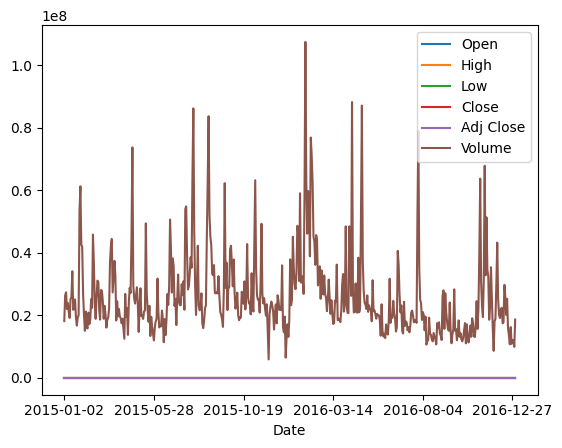

In [39]:
fb.loc['2015-01-01':'2016-12-31'].plot()

## Debugging
Key Error -> Index isn't right, forgot index_col=0

In [40]:
ms.loc["1986-03-19",'Open']

np.float64(0.099826)

In [41]:
fb[['Open','Close']]

,Open,Close
Date,,
2012-05-18,42.049999,38.230000
2012-05-21,36.529999,34.029999
2012-05-22,32.610001,31.000000
2012-05-23,31.370001,32.000000
2012-05-24,32.950001,33.029999
...,...,...
2022-03-18,206.699997,216.490005
2022-03-21,214.500000,211.490005
2022-03-22,211.369995,216.649994


## Reformatting the Data

### Price Difference
1. Here we use .shift(-1) to move the column of the close price up by 1 -> fb['close'].shift(-1) -> This gives you a new column with the closing price of tomorrow is the same row as the closing price of today
2. PriceDiff = (Close price of tomorrow - Close price of today)
3. Below is the Example

### Daily Return
1. Price Difference between 2 Day Closes / Close
fb['Return'] = (fb['CloseofTmr'] - fb['Close']) / fb['Close']

In [42]:
fb['CloseT'] = fb['Close'].shift(-1)
ms['CloseT'] = ms['Close'].shift(-1)
fb.head()

,Open,High,Low,Close,Adj Close,Volume,CloseT
Date,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,34.029999
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,31.000000
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,32.000000
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,33.029999
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,31.910000


In [43]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume,CloseT
Date,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800,0.100694
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000,0.102431
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200,0.099826
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400,0.098090
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400,0.095486


In [44]:
fb['Return'] = (fb['CloseT'] - fb['Close']) / fb['Close']
ms['Return'] = (ms['CloseT'] - ms['Close']) / ms['Close']
fb.head()
ms.head()

,Open,High,Low,Close,Adj Close,Volume,CloseT,Return
Date,,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800,0.100694,0.035712
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000,0.102431,0.017250
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200,0.099826,-0.025432
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400,0.098090,-0.017390
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400,0.095486,-0.026547


### List Comprehension -> Explanation generate a new column based on whether the any index represented by ei in Return using .loc()

Condition: if fb.loc[ei, 'Return'] > 0
Domain: for ei in fb.index

ei is also any index of fb

! Important for creation of complicated rules, List Comprehension is a useful funtion in python

In [45]:
fb['Direction'] = [1 if fb.loc[ei, 'Return'] > 0 else -1 for ei in fb.index]
ms['Direction'] = [1 if ms.loc[ei, 'Return'] >0 else -1 for ei  in ms.index]

In [46]:
fb.head()

,Open,High,Low,Close,Adj Close,Volume,CloseT,Return,Direction
Date,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,34.029999,-0.109861,-1
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,31.000000,-0.089039,-1
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,32.000000,0.032258,1
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,33.029999,0.032187,1
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,31.910000,-0.033909,-1


## Moving Averages
-> Average price over a defined number of days
-> Good if finding trends by smoothing out price
-> Result might have NaN = Not a Number since you're shifting the column down based on the number of days to look back on

Key Takeaway: Simple Models could be better if noise is a concern
Calculating Moving Averages can be done using .rolling() -> Calculate mean given sum

In [47]:
fb['MA40'] = fb['Close'].rolling(40).mean()
fb['MA200'] = fb['Close'].rolling(200).mean()
ms['MA40'] = ms['Close'].rolling(40).mean()
ms['MA200'] = ms['Close'].rolling(200).mean()

<Axes: title={'center': 'Facebook Price'}, xlabel='Date', ylabel='Price'>

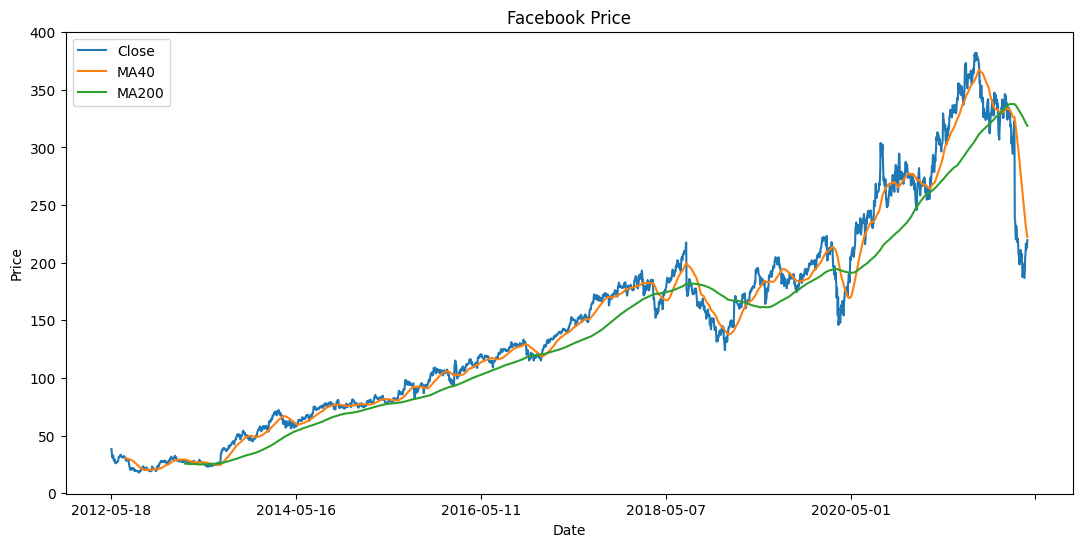

In [48]:
fb['Close'].plot(figsize=(13,6), ylabel='Price', title='Facebook Price', legend=True)
fb['MA40'].plot(legend=True)
fb['MA200'].plot(legend=True)

<Axes: title={'center': 'Microsoft Price'}, xlabel='Date', ylabel='Price'>

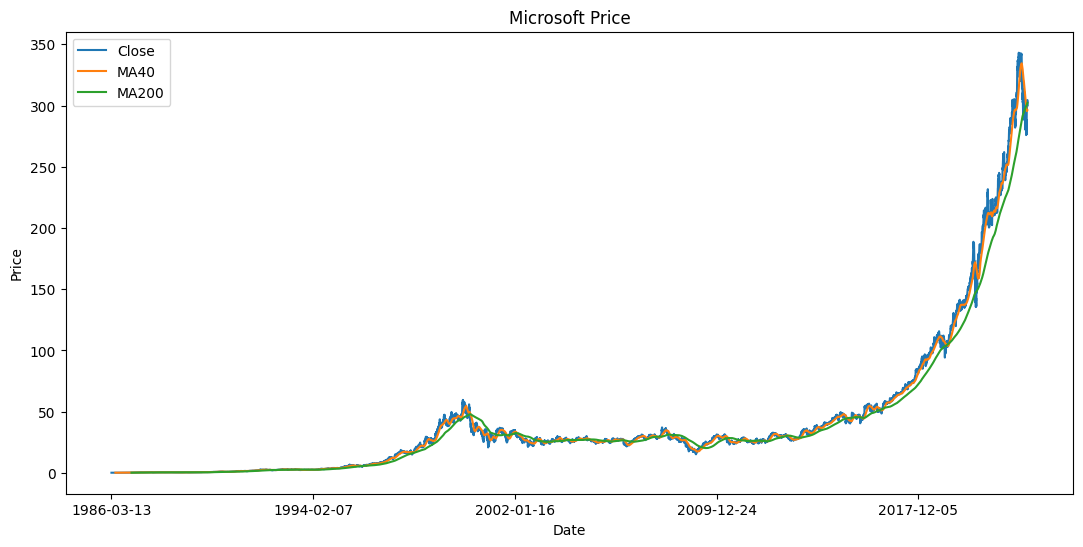

In [49]:
ms['Close'].plot(figsize=(13,6), ylabel='Price', title='Microsoft Price', legend=True)
ms['MA40'].plot(legend=True)
ms['MA200'].plot(legend=True)

# Lecture 1 Review:
1. Price Difference
2. Daily Return
3. Direction
4. Moving Average

Some other fun stuff -> Plotting Charts with Moving Average, List Comprehensions

In [50]:
fb = fb.dropna() # Drop rows the Not a Number (NaN) values
ms = ms.dropna() # Drop rows the Not a Number (NaN) values
fb.head()

,Open,High,Low,Close,Adj Close,Volume,CloseT,Return,Direction,MA40,MA200
Date,,,,,,,,,,,
2013-03-07,27.570000,28.680000,27.469999,28.580000,28.580000,74540200,27.959999,-0.021694,-1,29.16700,25.67010
2013-03-08,28.430000,28.469999,27.730000,27.959999,27.959999,44198900,28.139999,0.006438,1,29.10125,25.61875
2013-03-11,28.010000,28.639999,27.830000,28.139999,28.139999,35642100,27.830000,-0.011016,-1,29.02225,25.58930
2013-03-12,28.100000,28.320000,27.600000,27.830000,27.830000,27569600,27.080000,-0.026949,-1,28.92500,25.57345
2013-03-13,27.620001,27.650000,26.920000,27.080000,27.080000,39619500,27.040001,-0.001477,-1,28.82825,25.54885


# Continuation of Module 1 -> Long or Short
1. ['Shares'] to decide to go long or short based on whether MA40 is higher or lower than the MA200
2. ['DailyPnL'] to calculate gains from the days -> Assuming we're holding the position for the entirety of the day
3. ['Wealth'] using .cumsum() to sum the DailyPnL

Debugging
-> Type Error might have used () instead of [] to filter out a column

In [57]:
fb['Shares'] = [1 if fb.loc[ei, 'MA40'] > fb.loc[ei, 'MA200'] else 0 for ei in fb.index]
ms['Shares'] = [1 if ms.loc[ei, 'MA40'] > ms.loc[ei, 'MA200'] else 0 for ei in ms.index]

In [60]:
fb['DailyPnL'] = [fb.loc[ei, 'CloseT'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares'] == 1 else 0 for ei in fb.index]
ms['DailyPnL'] = [ms.loc[ei, 'CloseT'] - ms.loc[ei, 'Close'] if ms.loc[ei, 'Shares'] == 1 else 0 for ei in ms.index]

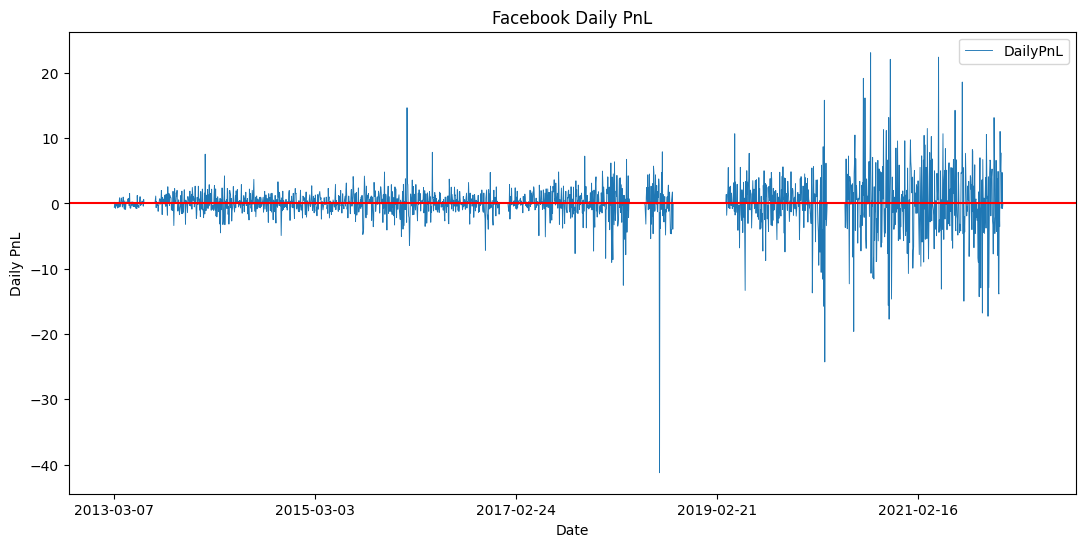

In [73]:
fb['DailyPnL'].plot(linewidth=0.65, figsize=(13,6), ylabel='Daily PnL', title='Facebook Daily PnL', legend=True)
plt.axhline(y=0,color='red')

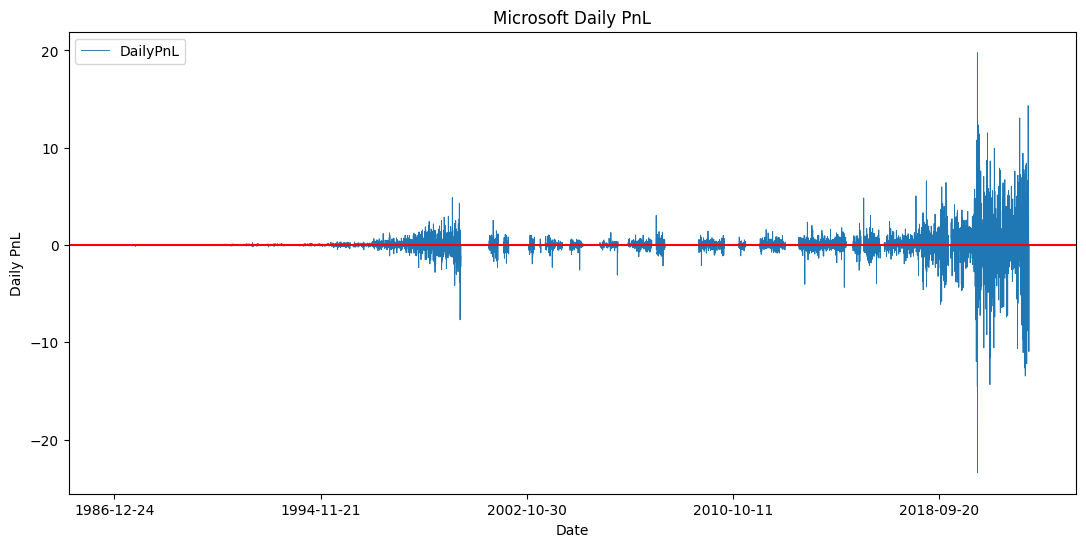

In [74]:
ms['DailyPnL'].plot(linewidth=0.65, figsize=(13,6), ylabel='Daily PnL', title='Microsoft Daily PnL', legend=True)
plt.axhline(y=0,color='red')

In [77]:
fb['TotalPnL'] = fb['DailyPnL'].cumsum()
ms['TotalPnL'] = ms['DailyPnL'].cumsum()

<Axes: title={'center': 'Facebook Total PnL'}, xlabel='Date', ylabel='Total PnL'>

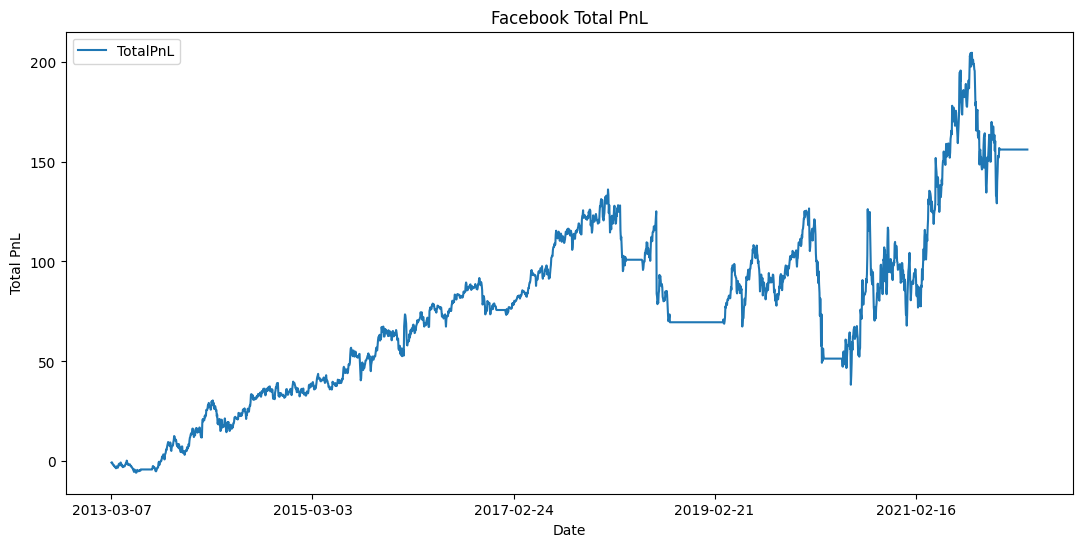

In [81]:
fb['TotalPnL'].plot(figsize=(13,6), title='Facebook Total PnL', ylabel='Total PnL', legend=True)

<Axes: title={'center': 'Microsoft Total PnL'}, xlabel='Date', ylabel='Total PnL'>

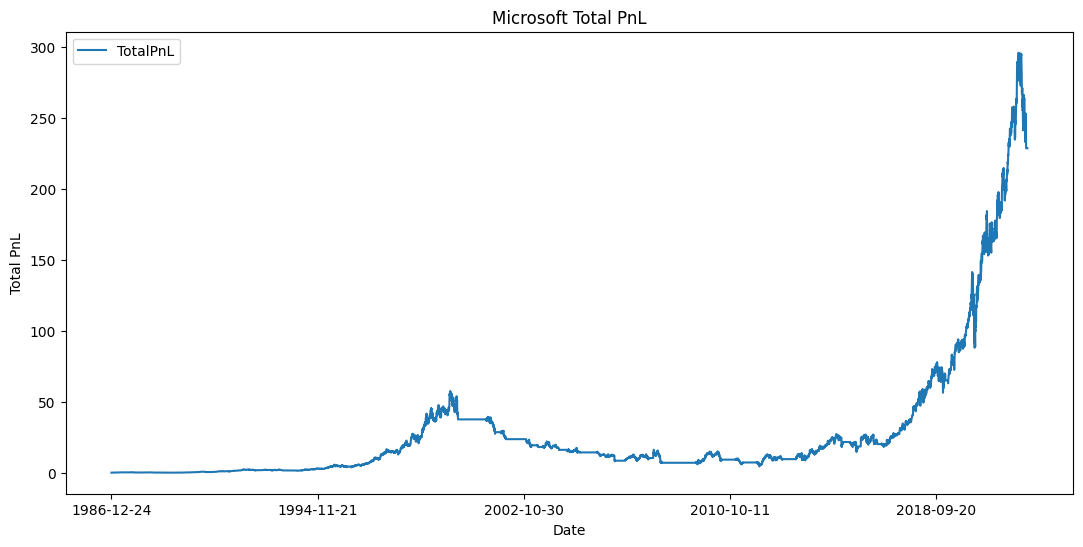

In [82]:
ms['TotalPnL'].plot(figsize=(13,6), title='Microsoft Total PnL', ylabel='Total PnL', legend=True)

In [ ]:
#